### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import pandas as pd
import matplotlib as plt

# File to Load (Remember to Change These)
file_to_load = "Resources/purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_df = pd.read_csv(file_to_load)
purchase_df

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44
...,...,...,...,...,...,...,...
775,775,Aethedru70,21,Female,60,Wolf,3.54
776,776,Iral74,21,Male,164,Exiled Doomblade,1.63
777,777,Yathecal72,20,Male,67,"Celeste, Incarnation of the Corrupted",3.46
778,778,Sisur91,7,Male,101,Final Critic,4.19


## Player Count

* Display the total number of players


In [2]:
# Total number of Players and display series
player_ct = len(purchase_df["SN"].value_counts())
player_ct = pd.Series(player_ct).reset_index()
player_ct.columns = ['', 'Total Players']
player_ct

,,Total Players
0,0,576


## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [3]:
# Find the total of Unique Items bought.
uniq_items_tots = len(purchase_df["Item Name"].unique())

# Find the average price of purchases, total revenue of purchases, total number of purchases
avg_price = purchase_df["Price"].mean()
revenue_total = purchase_df["Price"].sum()
total_purchases = purchase_df["Item ID"].count()

# Make summary df of purchase analysis findings
total_puranalysis_df = pd.DataFrame({"Number of Unique Items": [uniq_items_tots], 
                              "Average Price": avg_price, 
                              "Number of Purchases": total_purchases,
                              "Total Revenue": revenue_total})
total_puranalysis_df

,Number of Unique Items,Average Price,Number of Purchases,Total Revenue
0,179,3.050987,780,2379.77


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [4]:
# Find total count of players by gender & percentage
gender_count = purchase_df.groupby('Gender')["SN"].count()
gender_percentage = gender_count*100/gender_count.sum()

# Add column for percentage of each group into a dataframe
gender_df = pd.DataFrame(gender_percentage)
rename_gp = gender_df.rename(columns={"SN":"Gender Percentage"})

# Add total gender count to the dataframe
rename_gp["Total Players by Gender"] = gender_count

# Reorganize columns
reorg_df = rename_gp[["Total Players by Gender","Gender Percentage"]]
reorg_df.reset_index()

,Gender,Total Players by Gender,Gender Percentage
0,Female,113,14.487179
1,Male,652,83.589744
2,Other / Non-Disclosed,15,1.923077


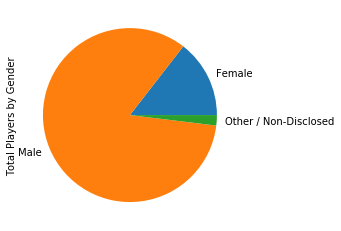

In [12]:
reorg_df["Total Players by Gender"].plot(kind="pie")
plt.savefig("../Images/gender_puranalysis_total.png")

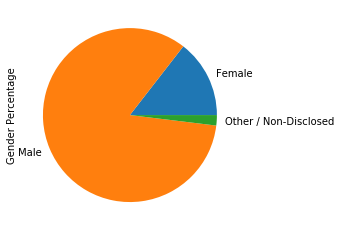

In [11]:
reorg_df["Gender Percentage"].plot(kind="pie")


## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [13]:
# Groupby gender
gender_group = purchase_df.groupby(['Gender'])

# Calculate purchase count, average purchase price, purchase total per person
gpurch_count = gender_group["Item ID"].count()
gavg_price = gender_group["Price"].mean()
total_purch = gender_group['Price'].sum()

# Make dataframe summary of purchases by gender
gender_puranalysis_df = pd.DataFrame({"Purchase Count by Gender": gpurch_count, 
                              "Average Purchase Price": gavg_price, 
                              "Average Purchase Total per Person": total_purch})
gender_puranalysis_df

,Purchase Count by Gender,Average Purchase Price,Average Purchase Total per Person
Gender,,,
Female,113,3.203009,361.94
Male,652,3.017853,1967.64
Other / Non-Disclosed,15,3.346000,50.19


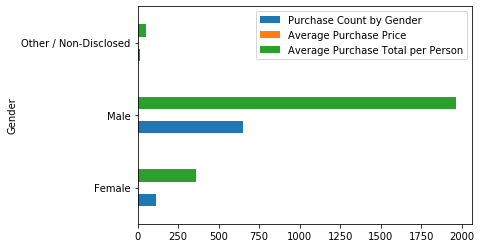

In [14]:
gender_puranalysis_df.plot(kind="barh")
plt.savefig("../Images/gender_puranalysis_df.png")

## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [15]:
# Make a bin and label for age
age_bins = [0, 10, 14, 19, 24, 29, 34, 39, 45]
age_rng_labels = ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]

# Slice data to place it into bins
purchase_df['Age Range'] = pd.cut(purchase_df["Age"], age_bins, labels=age_rng_labels)
purchase_df

# Group by age range
age_group = purchase_df.groupby("Age Range")

# Count players set it in a dataframe
age_count = age_group["SN"].count()
age_df = pd.DataFrame(age_count)

# Rename column to total count by age & get the summ of the column
age_rename = age_df.rename(columns={"SN":"Total Count by Age"})
total_age = age_rename["Total Count by Age"].sum()

# Calculate percentage
age_rename['Age Percentage']= age_rename['Total Count by Age']*100/total_age
age_rename

,Total Count by Age,Age Percentage
Age Range,,
<10,32,4.102564
10-14,19,2.435897
15-19,136,17.435897
20-24,365,46.794872
25-29,101,12.948718
30-34,73,9.358974
35-39,41,5.256410
40+,13,1.666667


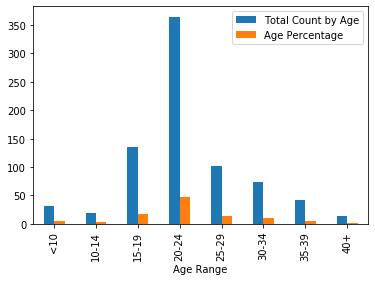

In [16]:
age_rename.plot(kind="bar")

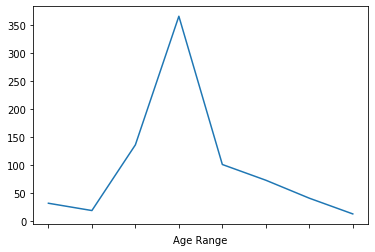

In [34]:
age_rename["Total Count by Age"].plot(kind="line")
plt.savefig("../Images/age_rename_count.png")

## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [18]:
# Make a bin and label for age
age_bins = [0, 10, 14, 19, 24, 29, 34, 39, 45]
age_rng_labels = ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]

# Slice data to place it into bins
purchase_df['Age Range'] = pd.cut(purchase_df["Age"], age_bins, labels=age_rng_labels)
purchase_df

# Group by age range
age_group = purchase_df.groupby("Age Range")

# Calculate purchase count, average purchase price, purchage total by age
age_count = age_group["Item ID"].count()
age_price = age_group["Price"].mean()
age_total = age_group['Price'].sum()

# Make dataframe summary of purchases by gender & reset index
age_puranalysis_df = pd.DataFrame({"Purchase Count": age_count, 
                              "Average Purchase Price": age_price, 
                              "Total Purchage Value": age_total})
age_puranalysis_df

,Purchase Count,Average Purchase Price,Total Purchage Value
Age Range,,,
<10,32,3.405000,108.96
10-14,19,2.681579,50.95
15-19,136,3.035956,412.89
20-24,365,3.052219,1114.06
25-29,101,2.900990,293.00
30-34,73,2.931507,214.00
35-39,41,3.601707,147.67
40+,13,2.941538,38.24


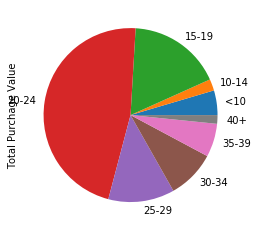

In [19]:
age_puranalysis_df["Total Purchage Value"].plot(kind="pie")
plt.savefig("../Images/age_puranalysis_df.png")

## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [20]:
# Group by players' screenName
top_spenders = purchase_df.groupby(["SN"])

# Calculate purchase count, average purchase price per spender,purchage total
spenders_count = top_spenders["Item ID"].count()
spenders_price = top_spenders["Price"].mean()
spenders_total = top_spenders['Price'].sum()

# Make dataframe summary of purchases by gender & reset index
top_spenders_df = pd.DataFrame({"Purchase Count": spenders_count, 
                              "Average Purchase Price": spenders_price, 
                              "Total Purchage Value": spenders_total})
top_spenders_df.reset_index()
top_spenders_df.sort_values(by="SN", ascending=False).head()

,Purchase Count,Average Purchase Price,Total Purchage Value
SN,,,
Zontibe81,3,2.676667,8.03
Zhisrisu83,2,3.945000,7.89
Yoishirrala98,1,4.580000,4.58
Yathedeu43,2,3.010000,6.02
Yathecal82,3,2.073333,6.22


In [26]:
top_spenders_df.sort_values(by="Purchase Count", ascending=False).head()

,Purchase Count,Average Purchase Price,Total Purchage Value
SN,,,
Lisosia93,5,3.792000,18.96
Iral74,4,3.405000,13.62
Idastidru52,4,3.862500,15.45
Asur53,3,2.480000,7.44
Inguron55,3,3.703333,11.11


In [27]:
top_spenders_df.sort_values(by="Total Purchage Value", ascending=False).head()

,Purchase Count,Average Purchase Price,Total Purchage Value
SN,,,
Lisosia93,5,3.792000,18.96
Idastidru52,4,3.862500,15.45
Chamjask73,3,4.610000,13.83
Iral74,4,3.405000,13.62
Iskadarya95,3,4.366667,13.10


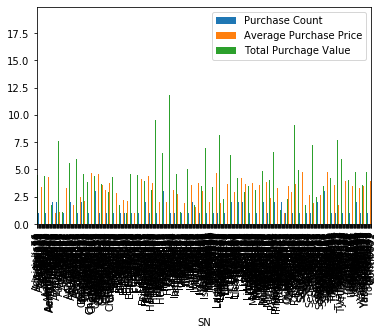

In [22]:
top_spenders_df.plot(kind="bar")

## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [24]:
# Retrieve the Item ID, Item Name, and Item Price columns
popular = purchase_df[["Item ID", "Item Name", "Price"]]
popular_group = popular.groupby(["Item ID", "Item Name"])

popular_count = popular_group["Price"].count()
popular_price = popular_group["Price"].mean()
popular_total = popular_group["Price"].sum()

# Make dataframe summary of purchases by gender & reset index
popular_df = pd.DataFrame({"Purchase Count": popular_count, 
                              "Average Purchase Price": popular_price, 
                              "Total Purchage Value": popular_total})
popular_df.reset_index()
popular_df.sort_values(by="Purchase Count", ascending=False).head()

,,Purchase Count,Average Purchase Price,Total Purchage Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
145,Fiery Glass Crusader,9,4.58,41.22
108,"Extraction, Quickblade Of Trembling Hands",9,3.53,31.77
82,Nirvana,9,4.90,44.10
19,"Pursuit, Cudgel of Necromancy",8,1.02,8.16


In [ ]:
# Identify incomplete rows
popular_df.count()

In [ ]:
# Drop all rows with missing information
popular_df = popular_df.dropna(how='any')

In [ ]:
# Verify dropped rows using count. Nothing changed.
popular_df.count()

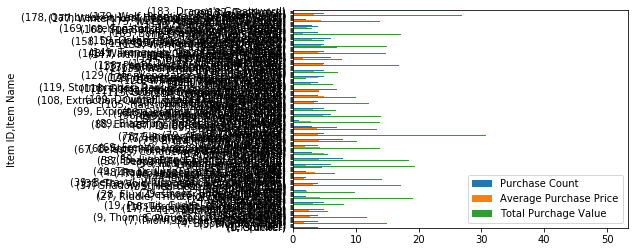

In [25]:
popular_df.plot(kind="barh")

## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [30]:
most_profit = popular_df.sort_values(by="Total Purchage Value", ascending=False).head()
most_profit

,,Purchase Count,Average Purchase Price,Total Purchage Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
82,Nirvana,9,4.90,44.10
145,Fiery Glass Crusader,9,4.58,41.22
92,Final Critic,8,4.88,39.04
103,Singed Scalpel,8,4.35,34.80


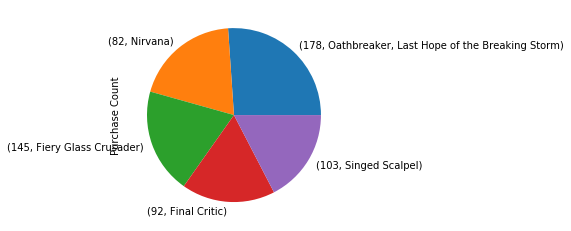

In [33]:
most_profit["Purchase Count"].plot(kind="pie")
plt.savefig("../Images/most_profit.png")